# Just checking how to read in numpy arrays from saved numpy files

In [4]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

In [5]:
# Some constants
# hm = 0.01 # 0.01s
# N = 50 # 50 nodes

In [64]:
# Numpy saved array format:
#     [qx, qy, qthb, qthlt, qthlb, dqx, dqy, dqthb, dqthlt, dqthlb, vx, hm, tauh, tauk]

qx_ar = np.array([])
qy_ar = np.array([])
qthb_ar = np.array([])
qthlt_ar = np.array([])
qthlb_ar = np.array([])
dqx_ar = np.array([])
dqy_ar = np.array([])
dqthb_ar = np.array([])
dqthlt_ar = np.array([])
dqthlb_ar = np.array([])
vx_ar = np.array([]) 
hm_ar = np.array([]) 
tauh_ar = np.array([]) 
tauk_ar = np.array([])

filebase = os.getcwd()
filepath = filebase + r'\\Datasets\\test3\\'
print("Directory: ", filepath)

count = 0

for file in os.listdir(filepath):
    filename = os.fsdecode(file)
    if filename.endswith(".npy"):  # import all stored values
        fileall = os.path.join(filepath, filename)
        print("Filename: ", filename)
        qx, qy, qthb, qthlt, qthlb, dqx, dqy, dqthb, dqthlt, dqthlb, vx_avg, hm, tauh, tauk = np.load(fileall, allow_pickle = True)
        
        N = len(qx)
        
        vx = vx_avg*np.ones(N)
        
        qx_ar = np.append(qx_ar, qx)
        qy_ar = np.append(qy_ar, qy)
        qthb_ar = np.append(qthb_ar, qthb)
        qthlt_ar = np.append(qthlt_ar, qthlt)
        qthlb_ar = np.append(qthlb_ar, qthlb)
        dqx_ar = np.append(dqx_ar, dqx)
        dqy_ar = np.append(dqy_ar, dqy)
        dqthb_ar = np.append(dqthb_ar, dqthb)
        dqthlt_ar = np.append(dqthlt_ar, dqthlt)
        dqthlb_ar = np.append(dqthlb_ar, dqthlb)
        vx_ar = np.append(vx_ar, vx)
        hm_ar = np.append(hm_ar, hm)
        tauh_ar = np.append(tauh_ar, tauh)
        tauk_ar = np.append(tauk_ar, tauk)

    else:
        continue

Directory:  C:\Users\Nick\Google Drive\PythonPrograms\machine_learning_projects\ReinforcementLearning_Monopod\\Datasets\\test3\\
Filename:  iter_10_n1ms.npy
Filename:  iter_11_p1ms.npy
Filename:  iter_12_p4ms.npy
Filename:  iter_13_p4ms.npy
Filename:  iter_14_n1ms.npy
Filename:  iter_15_p4ms.npy
Filename:  iter_17_p2ms.npy
Filename:  iter_18_p3ms.npy
Filename:  iter_19_n4ms.npy
Filename:  iter_1_n1ms.npy
Filename:  iter_20_p2ms.npy
Filename:  iter_2_p3ms.npy
Filename:  iter_3_p0ms.npy
Filename:  iter_4_n1ms.npy
Filename:  iter_5_p0ms.npy
Filename:  iter_6_n3ms.npy
Filename:  iter_7_n1ms.npy
Filename:  iter_8_p3ms.npy
Filename:  iter_9_n4ms.npy


In [65]:
# Reshape training data and training labels
train_data = np.stack((qx_ar, qy_ar, qthb_ar, qthlt_ar, qthlb_ar,
                       dqx_ar, dqy_ar, dqthb_ar, dqthlt_ar, dqthlb_ar,
                       vx_ar, hm_ar), axis = 1) # combine arrays to training data

train_data = np.reshape(train_data,(train_data.shape[0],train_data.shape[1],1)) # Reshape training data

train_labels = np.stack((tauh_ar, tauk_ar), axis = 1) # combine torques to make training labels

print(train_data.shape)
print(train_labels.shape)

(950, 12, 1)
(950, 2)


In [66]:
# Create Model

input_size = train_data.shape[1] # number of inputs to NN
output_size = train_labels.shape[1] # numer of outputs of NN

model = keras.Sequential([
        keras.layers.Flatten(input_shape=(input_size, 1)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(output_size)
    ])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [70]:
model.fit(train_data, train_labels, epochs=50) # train the model

Train on 950 samples
Epoch 1/50
950/950 [==============================] - 0s 113us/sample - loss: 0.0021 - accuracy: 0.8316
Epoch 2/50
950/950 [==============================] - 0s 97us/sample - loss: 0.0035 - accuracy: 0.8326
Epoch 3/50
950/950 [==============================] - 0s 101us/sample - loss: 0.0023 - accuracy: 0.8305
Epoch 4/50
950/950 [==============================] - 0s 105us/sample - loss: 0.0011 - accuracy: 0.8400
Epoch 5/50
950/950 [==============================] - 0s 105us/sample - loss: 0.0017 - accuracy: 0.8326
Epoch 6/50
950/950 [==============================] - 0s 105us/sample - loss: 0.0014 - accuracy: 0.8389
Epoch 7/50
950/950 [==============================] - 0s 101us/sample - loss: 0.0011 - accuracy: 0.8516
Epoch 8/50
950/950 [==============================] - 0s 101us/sample - loss: 9.4654e-04 - accuracy: 0.8611
Epoch 9/50
950/950 [==============================] - 0s 105us/sample - loss: 8.3281e-04 - accuracy: 0.8779
Epoch 10/50
950/950 [===============

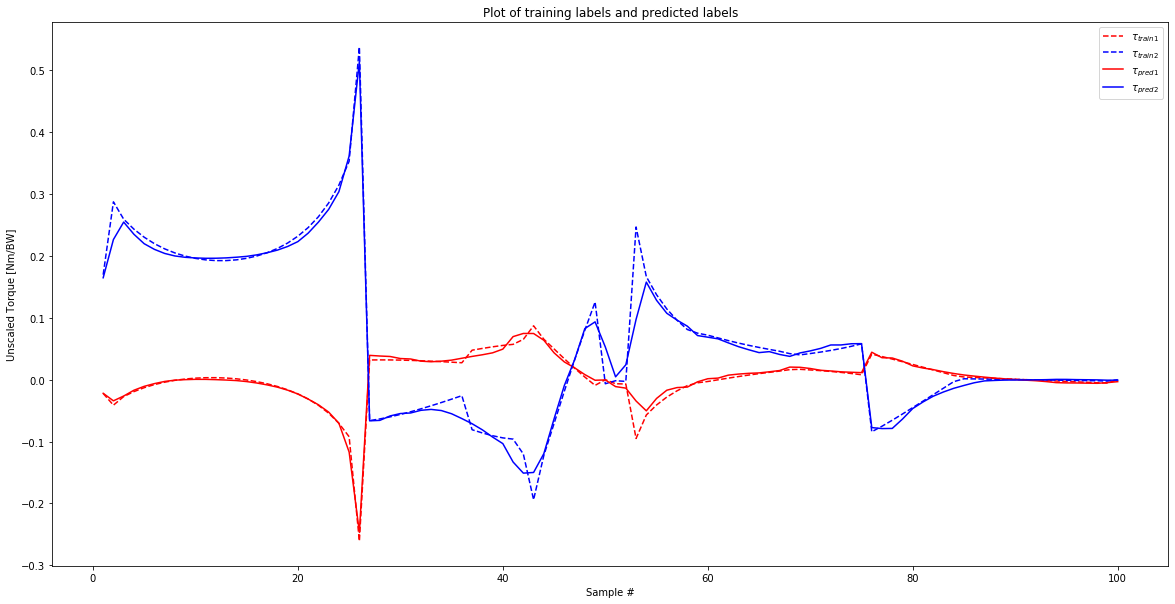

In [74]:
import matplotlib
import matplotlib.pyplot as plt

predictions = model.predict(train_data)
n = np.linspace(1, len(predictions), len(predictions))

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(n[0:100], train_labels[0:100,0], 'r--',n[0:100], train_labels[0:100,1], 'b--')
ax.plot(n[0:100], predictions[0:100,0], 'r-',n[0:100], predictions[0:100,1], 'b-')

ax.set(xlabel='Sample #', ylabel='Unscaled Torque [Nm/BW]',
       title='Plot of training labels and predicted labels');

ax.legend(["$\\tau_{train1}$", "$\\tau_{train2}$","$\\tau_{pred1}$", "$\\tau_{pred2}$"]);


In [ ]:
# Forward simulation of results